# Practice Project: Stock Price Analysis & Prediction  
Explore stock market and we will try to predicting future stock prices through Long Short Term Memory (LSTM) method. 
- Companies: 
    - NVIDIA (NVDA) – Semiconductors and AI.
    - AMD (AMD) – Also in semiconductors and a close competitor to NVIDIA.
    - Intel (INTC) – Another major semiconductor player.
    - TSMC (TSM) – The leading semiconductor manufacturer, crucial for companies like NVIDIA and AMD.

Question we will try to answer:
1. What was the change in price of the stock over time?
2. What was the moving average of the various stocks?
3. What was the daily return of the stock on average?
4. What was the correlation between different stocks?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of Nvidia using LSTM)

Note: Companies are most in US and one is TM. However, the absolute price is not relevent in this context, so no need to convert TSMC from NTD to USD.

# Data Creatoin and Data Overview.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import yfinance as yf

#Somehow using loop to create all data in one time create ticker, which is multilevel index that I just cannot figure out how to remove it, so I will just create them one by one
#NVDA
NVDA = yf.download('NVDA', start = '2023-11-22', end = '2024-11-22')
NVDA = pd.DataFrame(NVDA)
NVDA.columns = NVDA.columns.droplevel(1)
NVDA['Company_Name'] = 'Nvidia'

#AMD
AMD = yf.download('AMD', start = '2023-11-22', end = '2024-11-22')
AMD = pd.DataFrame(AMD)
AMD.columns = AMD.columns.droplevel(1)
AMD['Company_Name'] = 'AMD'

#INTC
INTC = yf.download('INTC', start = '2023-11-22', end = '2024-11-22')
INTC = pd.DataFrame(INTC)
INTC.columns = INTC.columns.droplevel(1)
INTC['Company_Name'] = 'Intel'

#TSM
TSM = yf.download('TSM', start = '2023-11-22', end = '2024-11-22')
TSM = pd.DataFrame(TSM)
TSM.columns = TSM.columns.droplevel(1)
TSM['Company_Name'] = 'TSMC'

df = pd.concat([NVDA, AMD, INTC, TSM])
df.head()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Company_Name
Date,,,,,,,
2023-11-22,48.701263,48.716000,50.334999,47.689999,49.852001,899420000,Nvidia
2023-11-24,47.761551,47.776001,48.921001,47.744999,48.470001,294645000,Nvidia
2023-11-27,48.227406,48.242001,48.529999,47.652000,47.799999,395662000,Nvidia
2023-11-28,47.806534,47.820999,48.323002,47.473000,48.236000,401491000,Nvidia
2023-11-29,48.125439,48.139999,48.762001,47.860001,48.379002,382005000,Nvidia


In [197]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,109.843814,110.115963,111.992672,108.216354,110.227896,1.313629e+08
std,55.121379,55.125854,56.113907,54.164660,55.233739,1.742870e+08
min,18.889999,18.889999,19.110001,18.510000,19.000000,4.297600e+06
25%,47.576749,47.953751,48.522499,47.320000,47.791749,2.626405e+07
50%,123.981133,124.440002,126.070004,121.815002,123.790001,4.950085e+07
75%,155.982529,156.135002,158.714996,153.695004,156.507504,1.736678e+08
max,211.380005,211.380005,227.300003,208.220001,213.410004,1.142269e+09


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2023-11-22 to 2024-11-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     1008 non-null   float64
 1   Close         1008 non-null   float64
 2   High          1008 non-null   float64
 3   Low           1008 non-null   float64
 4   Open          1008 non-null   float64
 5   Volume        1008 non-null   int64  
 6   Company_Name  1008 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.0+ KB


# Question 1: What was the change in price of the stock over time?

## Closing Price 
The closign price is the last price at which the stock traded during the regular trading day. A stock's closing price is the standard benchmard used by investors to track its performance overtime. 

In [199]:
company_name = ['Nvidia', 'AMD', 'Intel', 'TSMC']
company_list = ['NVDA' 'AMD' 'INTC' 'TSM']

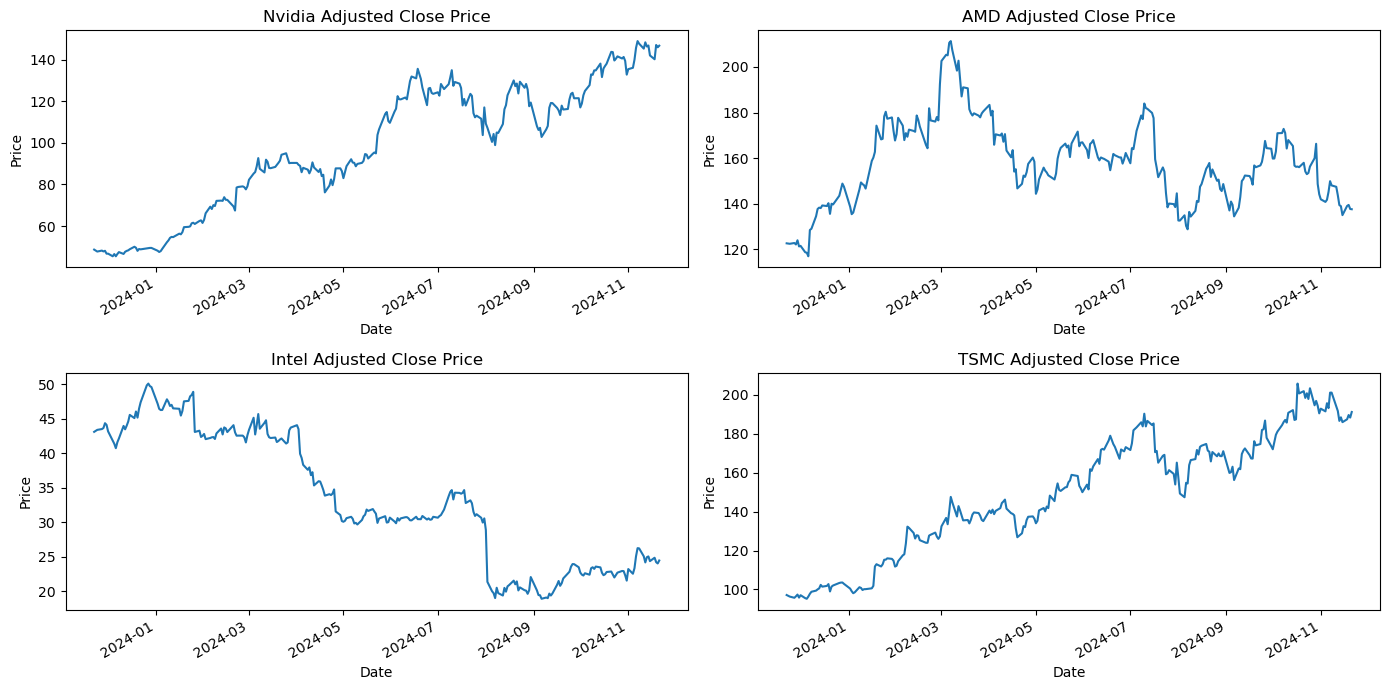

In [200]:
# See the adjusted close price of the stocks
fig, ax = plt.subplots(2, 2, figsize=(14, 7))
for i, ticker in enumerate(company_name):
    df[df['Company_Name'] == ticker]['Adj Close'].plot(ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'{ticker} Adjusted Close Price')
    ax[i//2, i%2].set_ylabel('Price')
    ax[i//2, i%2].set_xlabel('Date')
    
plt.tight_layout()

## Volume of Sales 
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For example, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume and changes to volume over the course of time, are important input for technical traders. 

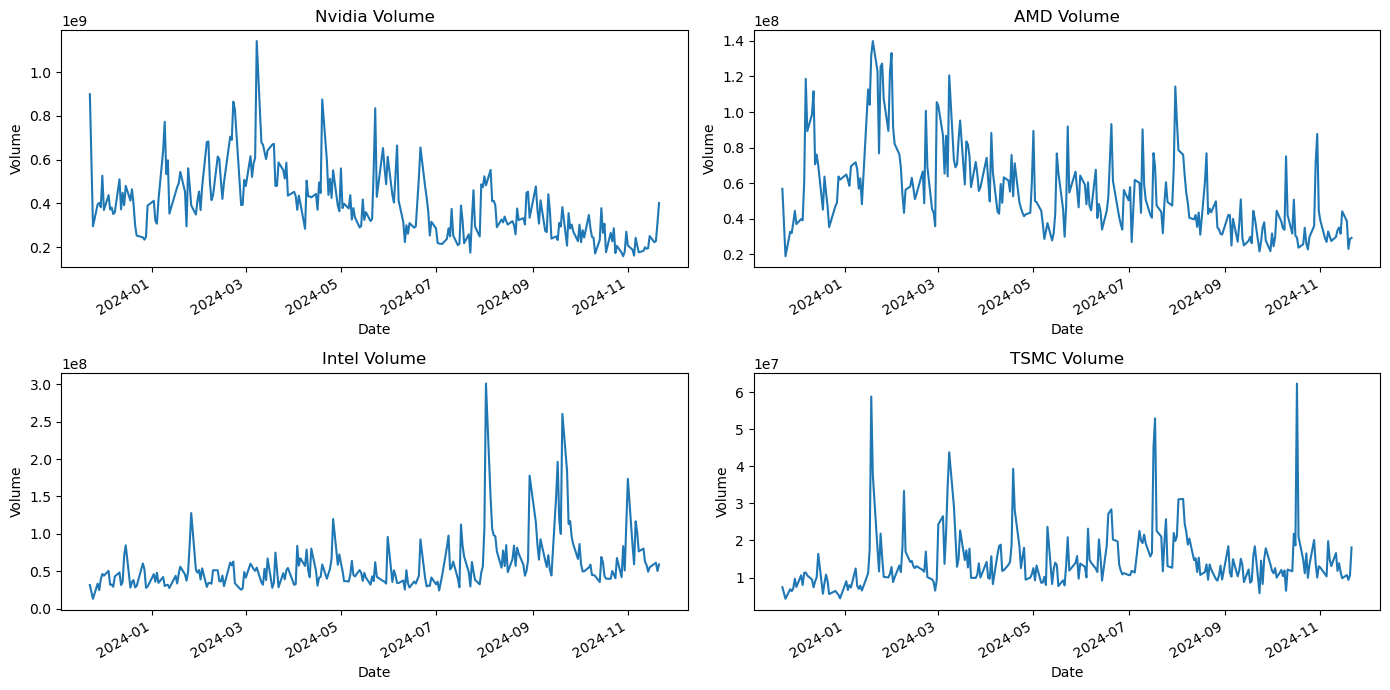

In [201]:
fig, ax = plt.subplots(2,2, figsize=(14, 7))
for i, ticker in enumerate(company_name):
    df[df['Company_Name'] == ticker]['Volume'].plot(ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'{ticker} Volume')
    ax[i//2, i%2].set_ylabel('Volume')
    
plt.tight_layout()
    

# Question 2: What was the moving average of the various stocks?

## Moving Avergae 
Moving average (MA) is a simple technical analysis tool that smooth out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 30 minutes, 22 weeks, or any time priod the trader choose. 

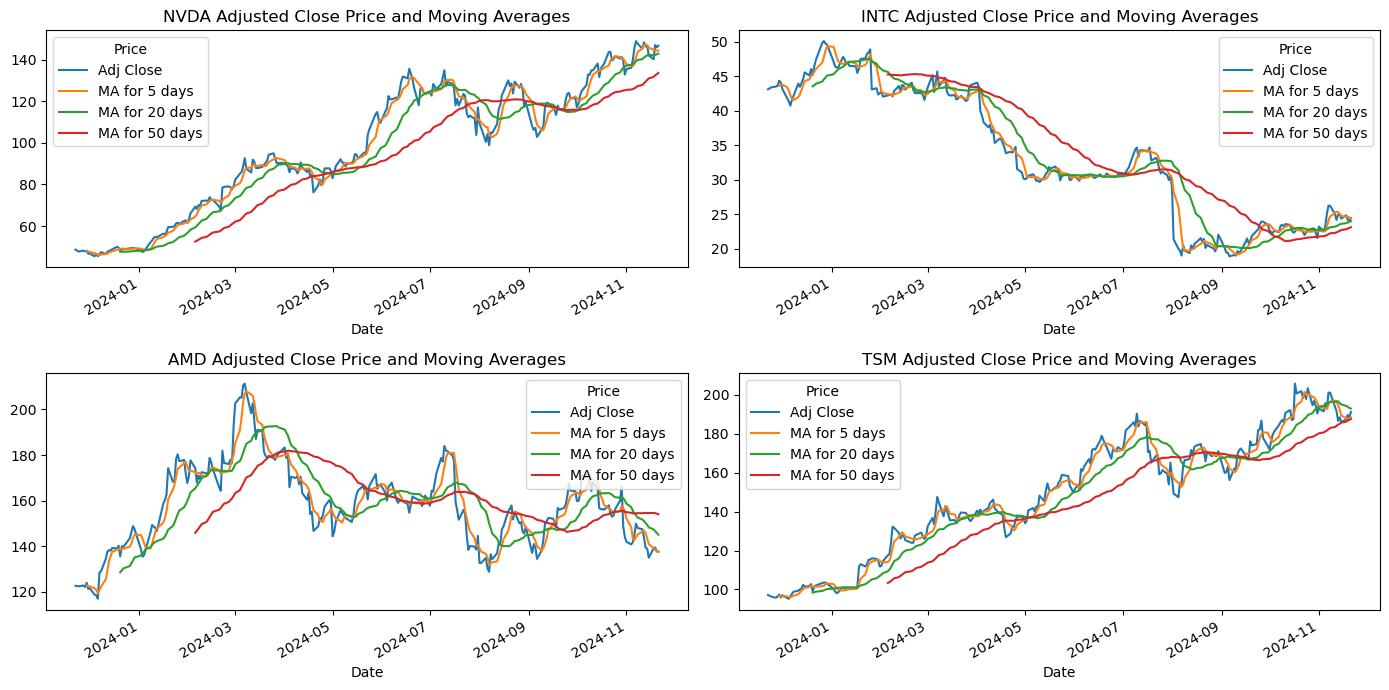

In [202]:
ma_days = [5, 20, 50]

#Set columns with ma_days in each company's dataframe
for ma in ma_days:
    for company in company_name:
        column_name = f'MA for {ma} days'
        if company == 'Nvidia':
            NVDA[column_name] = NVDA['Adj Close'].rolling(window=ma).mean()
        elif company == 'AMD':
            AMD[column_name] = AMD['Adj Close'].rolling(window=ma).mean()
        elif company == 'Intel':
            INTC[column_name] = INTC['Adj Close'].rolling(window=ma).mean()
        elif company == 'TSMC':
            TSM[column_name] = TSM['Adj Close'].rolling(window=ma).mean()

# Plot the adjusted close price and moving averages
fig, axes = plt.subplots(2, 2, figsize=(14, 7))

NVDA[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('NVDA Adjusted Close Price and Moving Averages')

INTC[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('INTC Adjusted Close Price and Moving Averages')

AMD[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMD Adjusted Close Price and Moving Averages')

TSM[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TSM Adjusted Close Price and Moving Averages')

fig.tight_layout()



Moving average = 5 or 20 have the best presentation, 50 days is just too off the trend. 

# Question 3: What was the daily return of the stock on average?

## Daily return 
It is basically find the percentage change on a daily bases. 

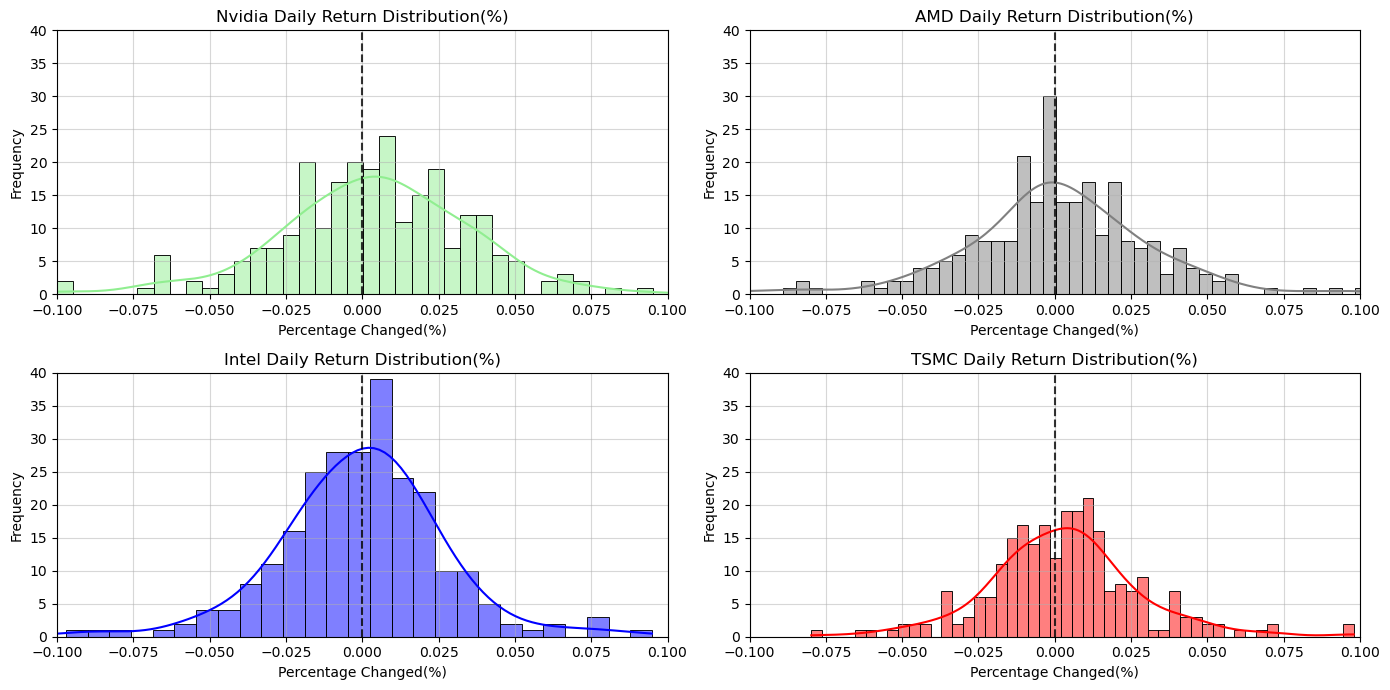

In [203]:
# Define the list of company dataframes and their corresponding colors
company_dfs = [NVDA, AMD, INTC, TSM]
company_colors = ['lightgreen', 'grey', 'blue', 'red']

# Calculate the daily return for each company
for company in company_dfs:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Create subplots for the daily return distributions
fig, ax = plt.subplots(2, 2, figsize=(14, 7))

# Plot the daily return distribution for each company
for i, (ticker, company, color) in enumerate(zip(company_name, company_dfs, company_colors)):
    sns.histplot(
        company['Daily Return'],
        bins=50,
        kde=True,
        ax=ax[i//2, i%2],
        color=color
    )
    ax[i//2, i%2].set_title(f'{ticker} Daily Return Distribution(%)')
    ax[i//2, i%2].set_ylabel('Frequency')
    ax[i//2, i%2].set_xlim(-0.1, 0.1)
    ax[i//2, i%2].set_ylim(0, 40)
    ax[i//2, i%2].set_xlabel('Percentage Changed(%)')
    ax[i//2, i%2].grid(alpha=0.5)
    ax[i//2, i%2].axvline(0.000, color='black', linestyle='--', alpha=0.8, linewidth=1.5)  # Add a vertical line at 0

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Question 4: What was the correlation between different stocks?

In [204]:
# Create a dataframe that contains the daily return of each company
daily_return_df = pd.concat([company['Daily Return'] for company in company_dfs], axis=1)
Closing_df = pd.concat([company['Adj Close'] for company in company_dfs], axis=1)
# Rename the columns to the corresponding company names
daily_return_df.columns = company_name
Closing_df.columns = company_name
daily_return_df.head()


,Nvidia,AMD,Intel,TSMC
Date,,,,
2023-11-22,NaN,NaN,NaN,NaN
2023-11-24,-0.019295,-0.001633,0.006641,-0.008312
2023-11-27,0.009754,0.002780,0.002730,-0.006337
2023-11-28,-0.008727,-0.005218,0.003403,0.007921
2023-11-29,0.006671,0.015081,0.016052,0.009185


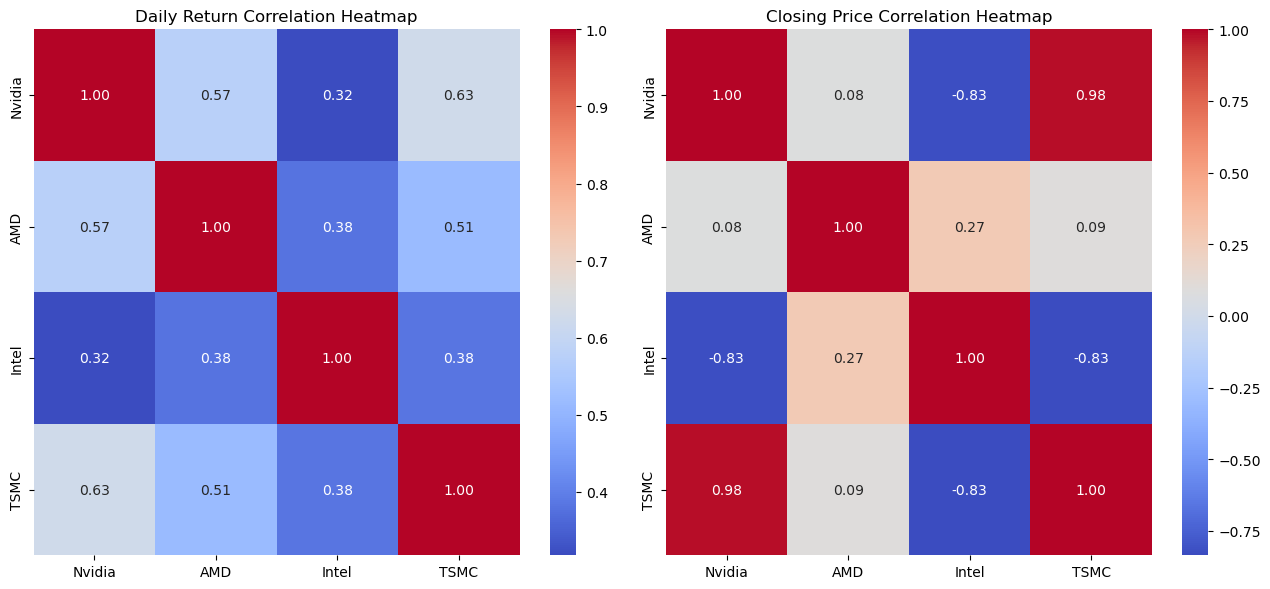

In [205]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13, 6))

sns.heatmap(daily_return_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax0)
ax0.set_title('Daily Return Correlation Heatmap')

sns.heatmap(Closing_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax1)
ax1.set_title('Closing Price Correlation Heatmap')

plt.tight_layout()
plt.show()


It's interesting to see that Nvidia & TSMC have 0.98 correlation on closing price. Since TSMC is helping Nvidia manufacturing their chips and GPUs, no wonder why their stock closing price are move in lockstep. 

# Question 5: How much value do we put at risk by investing in a particular stock? 


C:\Users\oscar\AppData\Local\Temp\ipykernel_40812\403297093.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(ticker, (daily_return_df.mean()[i], daily_return_df.std()[i]), fontsize=20, color=company_colors[i])


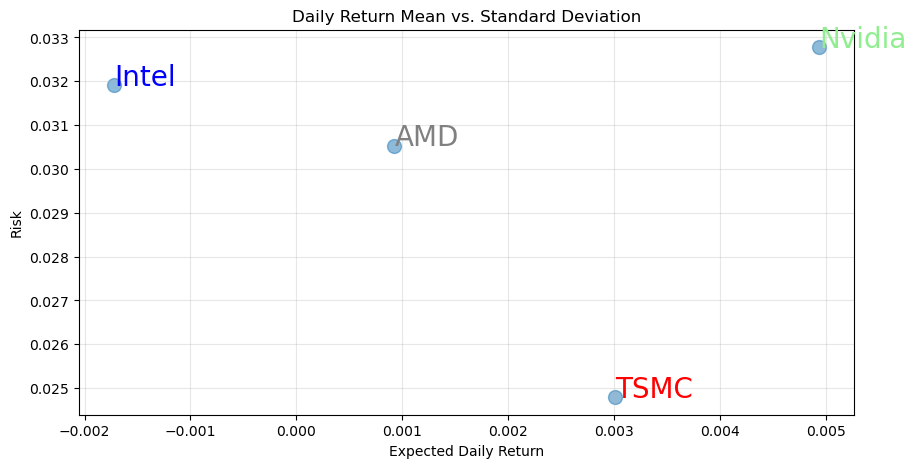

In [206]:
plt.figure(figsize=(10, 5))
plt.scatter(daily_return_df.mean(), daily_return_df.std(), alpha=0.5, s=100)
plt.title('Daily Return Mean vs. Standard Deviation')
plt.xlabel('Expected Daily Return')
plt.ylabel('Risk')
plt.grid(alpha=0.3)

# label the points with the company names
for i, ticker in enumerate(company_name):
    plt.annotate(ticker, (daily_return_df.mean()[i], daily_return_df.std()[i]), fontsize=20, color=company_colors[i])
plt.show()
    

We calcualte the risk by quantified the volatility of stock's daily return. In finance, volatility(or risk) is often represented by how much the stock is price swings. 
- Insights: 
    - If you are a aggresive risk trader, Nvidia is the one to choose.
    - If you are a conservative trader, TSMC is a wonderful choise, higher return than AMD and Intel with significant lower risk. 

# Questoin 6: How can we attempt to predict future stock behavior?

Let's first predict NVDA stock price 

<Figure size 1600x600 with 0 Axes>

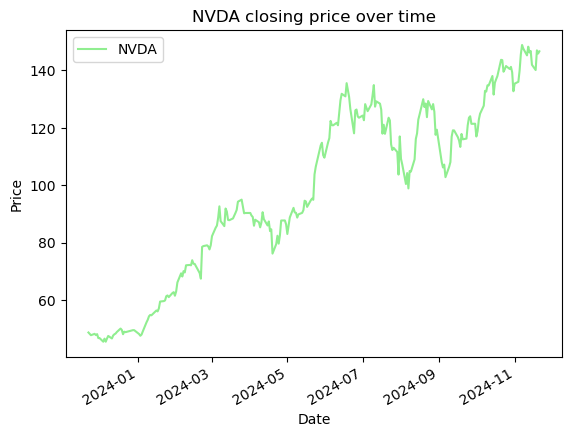

In [207]:
plt.figure(figsize=(16,6))
NVDA.plot(y='Adj Close', label='NVDA', color='lightgreen')
plt.title('NVDA closing price over time')
plt.ylabel('Price')
plt.show()

In [208]:
NVDA.dropna(inplace=True)
NVDA.drop(columns='Company_Name', inplace=True)
NVDA.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA for 5 days',
       'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object', name='Price')

In [209]:
NVDA = NVDA.filter(['Adj Close'])
NVDA_value = NVDA.values

NVDA_trainig_data_len = int(np.ceil(len(NVDA_value) * .95))
NVDA_trainig_data_len

193

In [210]:
# scale 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(NVDA_value)
scaled_data

array([[0.02283895],
       [0.00922152],
       [0.03225678],
       [0.02663301],
       [0.0572323 ],
       [0.05864438],
       [0.05717084],
       [0.07892932],
       [0.06367877],
       [0.06312621],
       [0.02431231],
       [0.        ],
       [0.1358792 ],
       [0.13930502],
       [0.14268183],
       [0.13788067],
       [0.12513513],
       [0.14292733],
       [0.18181488],
       [0.21813614],
       [0.22711244],
       [0.26070934],
       [0.30944687],
       [0.24631775],
       [0.22477937],
       [0.30016359],
       [0.28757707],
       [0.25142597],
       [0.250112  ],
       [0.25770087],
       [0.26928057],
       [0.2812408 ],
       [0.29429395],
       [0.32933985],
       [0.33809511],
       [0.30812071],
       [0.27974261],
       [0.28104431],
       [0.28113023],
       [0.2699436 ],
       [0.26395112],
       [0.22638794],
       [0.25221194],
       [0.2414673 ],
       [0.21962186],
       [0.24031299],
       [0.2842369 ],
       [0.254

## Training Data Creation (sliding window approach):
1. Form input/output pairs:
    - x_train: Contains sequences of the past 60 values.
    - y_train: The target is the value following each 60-value sequence, which aligning with LSTMs' need for sequential data. 
2. Convert to NumPy arrays: Converts x_train and y_train into NumPy arrays for model compatibility.
3. Reshape for LSTM: Reshapes x_train to 3D format (samples, timesteps, features) required by LSTM layers.

## Reason yo use Sliding Window Approach rather than train_test_split:
The sliding window approach creates sequences of fixed size from time-series data, which is necessary for training LSTM model effectively. Each sequence provides context by including past values (e.g., the last 60 days) to predict the next value, making it well-suited for sequential learning. 

In [211]:
# create the training data set
train_data = scaled_data[0:int(NVDA_trainig_data_len), :]

X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(X_train)
        print(y_train)
        print()
        
# convert the x_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


[array([0.02283895, 0.00922152, 0.03225678, 0.02663301, 0.0572323 ,
       0.05864438, 0.05717084, 0.07892932, 0.06367877, 0.06312621,
       0.02431231, 0.        , 0.1358792 , 0.13930502, 0.14268183,
       0.13788067, 0.12513513, 0.14292733, 0.18181488, 0.21813614,
       0.22711244, 0.26070934, 0.30944687, 0.24631775, 0.22477937,
       0.30016359, 0.28757707, 0.25142597, 0.250112  , 0.25770087,
       0.26928057, 0.2812408 , 0.29429395, 0.32933985, 0.33809511,
       0.30812071, 0.27974261, 0.28104431, 0.28113023, 0.2699436 ,
       0.26395112, 0.22638794, 0.25221194, 0.2414673 , 0.21962186,
       0.24031299, 0.2842369 , 0.25439761, 0.2275668 , 0.24493013,
       0.20342521, 0.21123494, 0.10721484, 0.14795843, 0.18363053,
       0.14991089, 0.18619701, 0.24885949, 0.24912973, 0.2324909 ])]
[0.19121930449812286]

[array([0.02283895, 0.00922152, 0.03225678, 0.02663301, 0.0572323 ,
       0.05864438, 0.05717084, 0.07892932, 0.06367877, 0.06312621,
       0.02431231, 0.        , 0.13

In [212]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=5, epochs=100)

Epoch 1/100


c:\Users\oscar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.1811
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0135
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0108
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0090
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0078
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0115
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0068
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0058
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0082
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0086
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0069
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0069
Epoch 15/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0049
E

In [213]:
# create the testing data set
test_data = scaled_data[NVDA_trainig_data_len - 60: , :]
X_test = []
y_test = NVDA_value[NVDA_trainig_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
# convert the data to a numpy array
X_test = np.array(X_test)

# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# get the models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


1.535296630859375

C:\Users\oscar\AppData\Local\Temp\ipykernel_40812\3765862429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


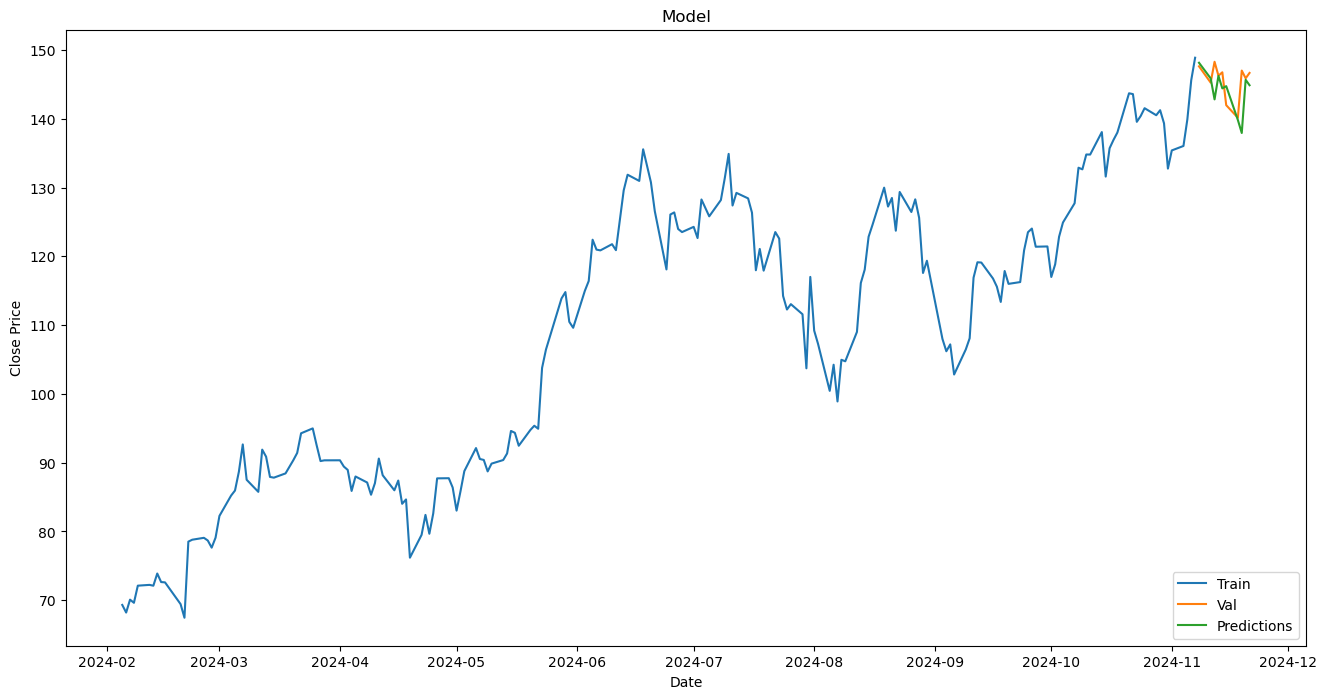

In [214]:
# plot 
train = NVDA[:NVDA_trainig_data_len]
valid = NVDA[NVDA_trainig_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

I increase the batch size and epochs to improve the predictions. 

# Summary:

Questions Answered:
1. What was the change in price of the stock over time?
    - See charts. 
2. What was the moving average of the various stocks?
    - See graph, and using moving average days 5-20 days have the best understanding of fluctuations, days like 50 does not present the trends.
3. What was the daily return of the stock on average?
    - See charts 
        - Nvidia is slightly skewed toward positive returns, indicating it might provide facoriable opportunities for short-term gains.
        - AMD is clusteres tightly around zero, suggesting it's daily return are more stable, which appearling to risk-averse traders. 
        - Intel is also cluster around zero, signaling consistent small fluctuations, ideal for day trading strategies. 
        - TSMC has a smaller spread and lower frequency, showing less volatility and fewer dramatic daily changes, making it appear more stable but less attracting to aggressive day traders. 
4. What was the correlation between different stocks?
    - High correlation (0.98) between Nvidia and TSMC, which implies that the price of both stock tend to move in near lockstep. And the high correlation could be due to the fact that TSMC is manufacturer Nvidia's high performance chips, including GPUs.  
5. How much value do we put at risk by investing in a particular stock?
    - see graph, Nvidia have high risk, high return, and TSMC have lowest risk with relatively high return. 
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of Nvidia using LSTM)

2. What I'd learned 
    - Apply LSTM 
    - Sliding Window Approach to create sequences of fixed size from time series data for models like LSTM.
    - Dive deep on reshaping the data, I'd iterate the code on preprocessing and model building many many times before it works. 